In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
import seaborn as sns
import itertools
import scipy.stats as ssp
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df2=df[['iyear','imonth','iday','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','weaptype1_txt','nkill','natlty1_txt']]

In [4]:
df3 = df2.dropna()

In [5]:
df3

,iyear,imonth,iday,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,natlty1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Unknown,1.0,Dominican Republic
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,Belgium
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0,United States
5,1970,1,1,United States,North America,Cairo,Armed Assault,Police,Firearms,0.0,United States
6,1970,1,2,Uruguay,South America,Montevideo,Assassination,Police,Firearms,0.0,Uruguay
...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,Military,Firearms,1.0,Somalia
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,Bombing/Explosion,Military,Explosives,2.0,Russia
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Incendiary,0.0,Philippines
181689,2017,12,31,India,South Asia,Imphal,Bombing/Explosion,Government (General),Explosives,0.0,India


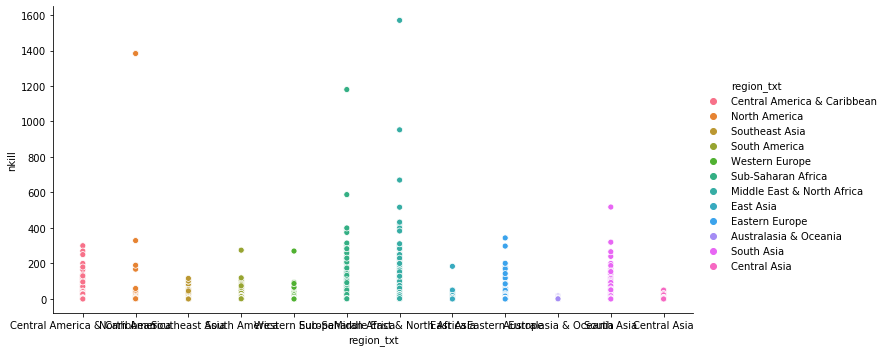

In [6]:
sns.title = 'Ilość ofiar w poszczególnych regionach'

sns.relplot(x = 'region_txt',
          y = 'nkill',
          data =df3,
          aspect = 2,
          hue = 'region_txt')
plt.show() 

In [7]:
x = df3.attacktype1_txt.groupby(df3.region_txt).count()

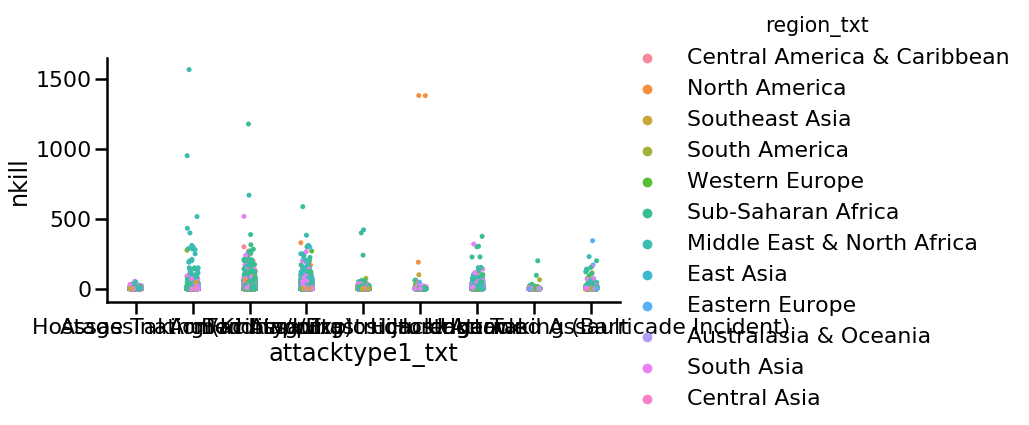

In [39]:
# ilość ofiar w regionie z podziałem na typ ataku (??)
sns.title = 'Ilość rodzajów ataków w poszczególnych regionach'


sns.catplot(x = 'attacktype1_txt',
          y = 'nkill',
          data = df3,
          aspect = 2,
          hue = 'region_txt')
plt.show() 

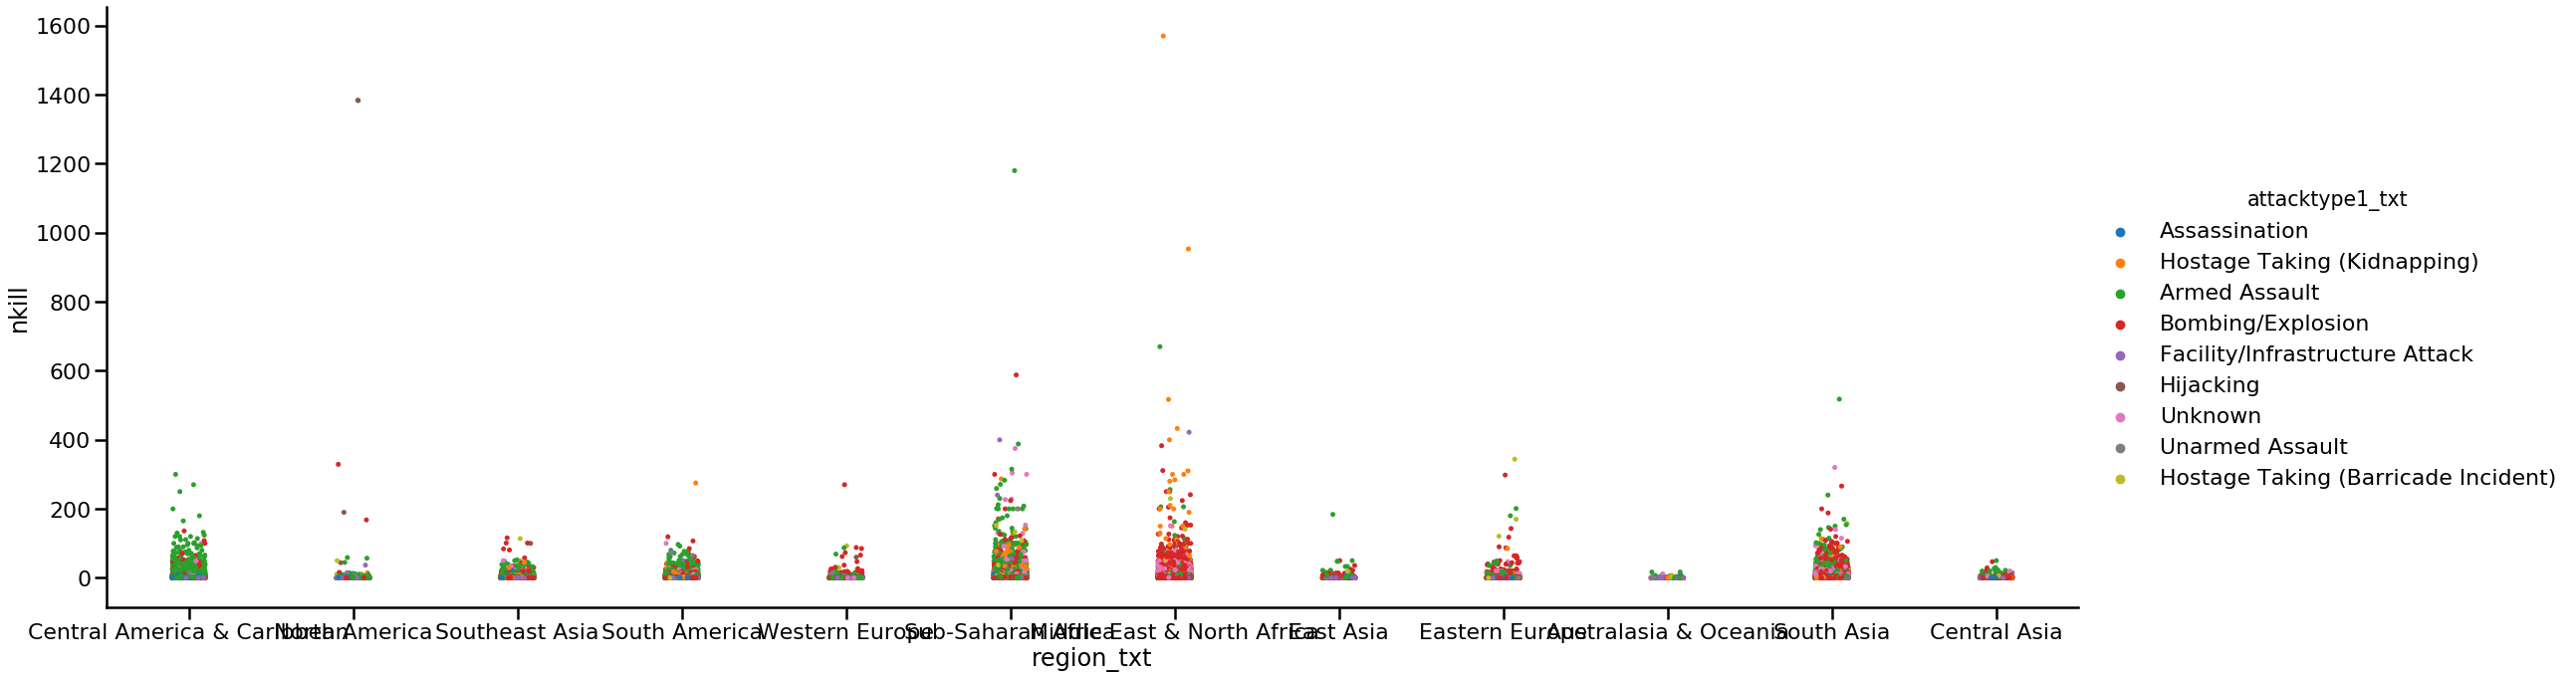

In [70]:
# ilość ofiar danego typu ataku z podziałem na region (??)
sns.title = 'Ilość rodzajów ataków w poszczególnych regionach'

sns.catplot(x = 'region_txt',
          y = 'nkill',
          data = df3,
          aspect = 3,
          hue = 'attacktype1_txt',  size = 10
          )
plt.show() 

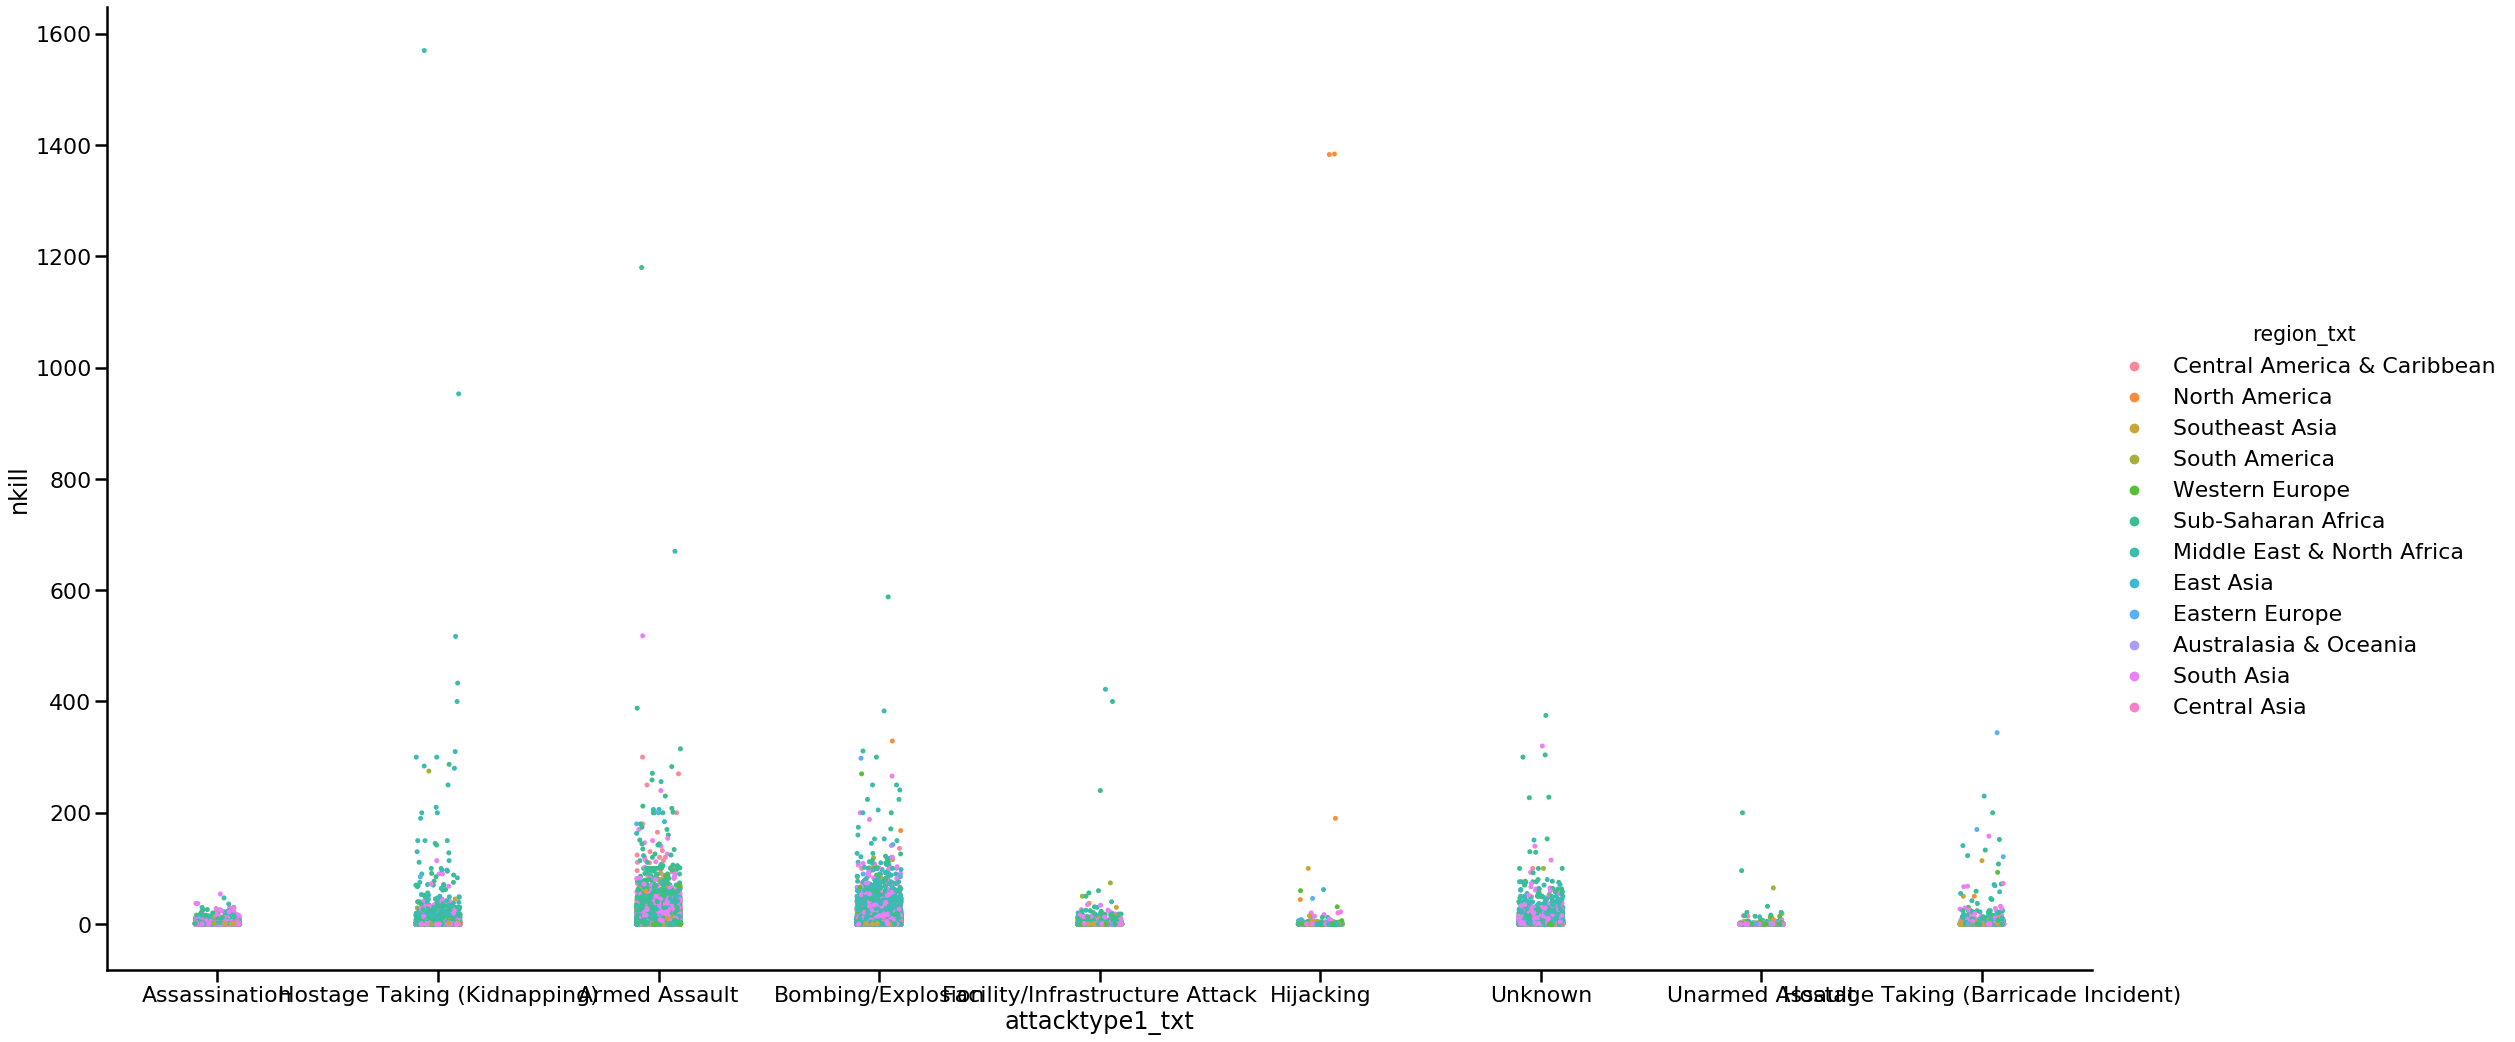

In [72]:
sns.title = 'Ilość ofiar w poszczególnych regionach'

sns.catplot(x = 'attacktype1_txt',
          y = 'nkill',
          data =df3,
          aspect = 2,
          hue = 'region_txt',  size = 15)
plt.show() 

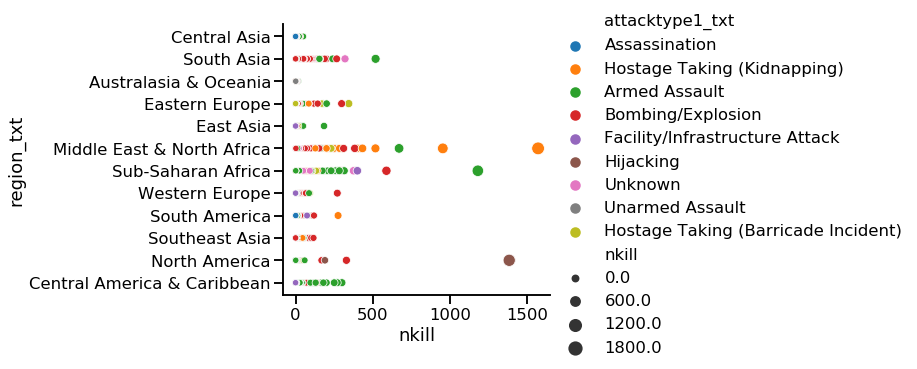

In [9]:
# rozkład ilościowy ofiar wg typów ataku typ 'talk'
sns.set_context('talk')
sns.relplot(x = "nkill", 
            y = "region_txt", 
            aspect = 2, 
            data = df3,
            size = 'nkill',
            hue = 'attacktype1_txt',
            kind = "scatter");


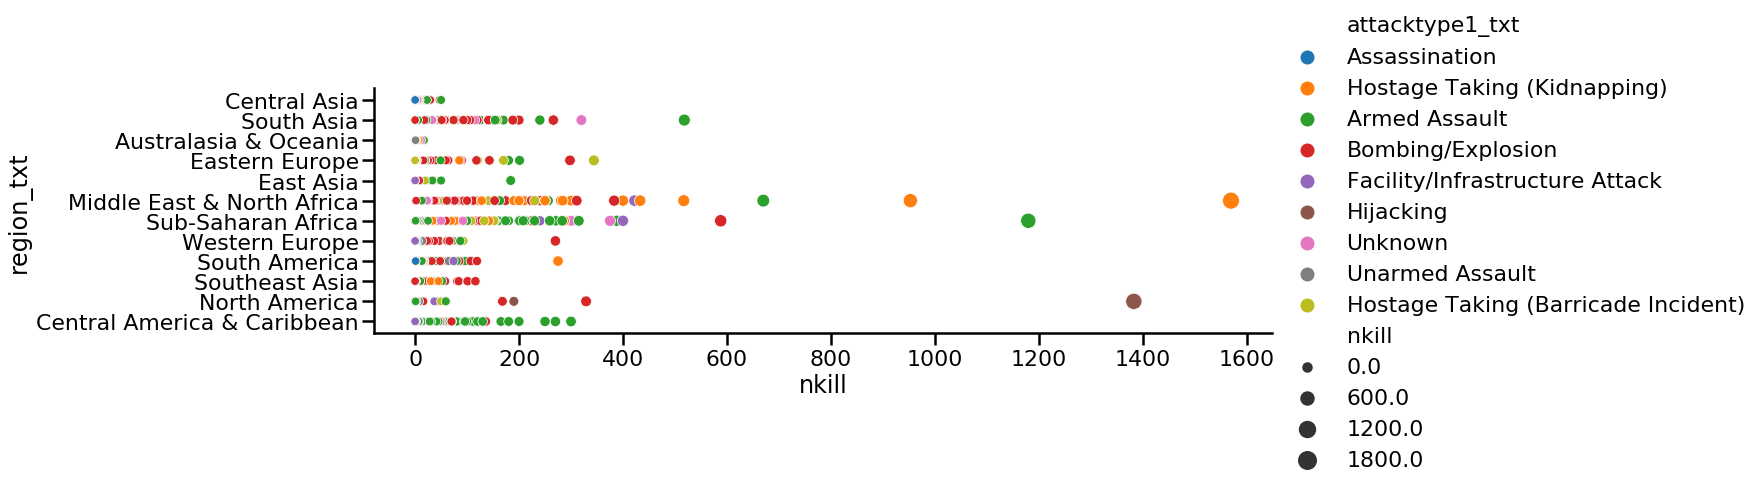

In [10]:
# rozkład ilościowy ofiar wg typów ataku typ 'poster'
sns.set_context('poster')
sns.relplot(x = "nkill", 
            y = "region_txt", 
            aspect = 4, 
            data = df3,
            size = 'nkill',
            hue = 'attacktype1_txt',
            kind = "scatter");

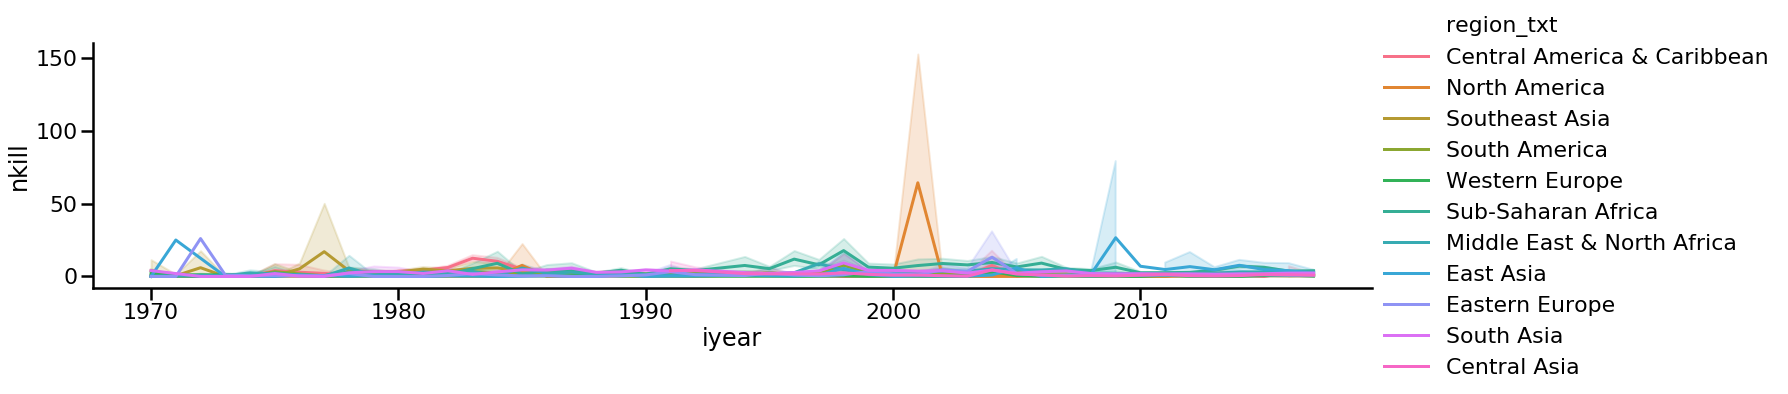

In [69]:
sns.set_context('poster')
sns.relplot(data=df3[(df3['region_txt'] == 'Australasia & Oceania ') | (df3['region_txt'] == 'Central America & Caribbean') |
                     (df3['region_txt'] == 'Central Asia') | (df3['region_txt'] == 'East Asia') |
                     (df3['region_txt'] == 'Eastern Europe') | (df3['region_txt'] == 'Middle East & North Africa') |
                     (df3['region_txt'] == 'North America') | (df3['region_txt'] == 'South America') |
                     (df3['region_txt'] == 'South Asia') | (df3['region_txt'] == 'Southeast Asia') |
                     (df3['region_txt'] == 'Sub-Saharan Africa') | (df3['region_txt'] == 'Western Europe')],
            x="iyear",
            y="nkill",
            aspect=4, 
            kind='line',
            hue='region_txt')
plt.show()

In [12]:
d_wykres=df3.groupby(['iyear','region_txt'])['nkill'].sum()

In [14]:
x=d_wykres['iyear','region_txt']
y=d_wykres['nkill']
plt.barplot(x,y)

KeyError: ('iyear', 'region_txt')